Found 2800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.
Epoch 1/15
88/88 [==============================] - 524s 6s/step - loss: 0.5028 - accuracy: 0.8650 - val_loss: 0.1982 - val_accuracy: 0.9708
Epoch 2/15
88/88 [==============================] - 514s 6s/step - loss: 0.1423 - accuracy: 0.9832 - val_loss: 0.1305 - val_accuracy: 0.9733
Epoch 3/15
88/88 [==============================] - 508s 6s/step - loss: 0.0840 - accuracy: 0.9911 - val_loss: 0.1307 - val_accuracy: 0.9617
Epoch 4/15
88/88 [==============================] - 478s 5s/step - loss: 0.0575 - accuracy: 0.9939 - val_loss: 0.0949 - val_accuracy: 0.9758
Epoch 5/15
88/88 [==============================] - 487s 6s/step - loss: 0.0516 - accuracy: 0.9950 - val_loss: 0.0784 - val_accuracy: 0.9808
Epoch 6/15
88/88 [==============================] - 476s 5s/step - loss: 0.0424 - accuracy: 0.9957 - val_loss: 0.0876 - val_accuracy: 0.9750
Epoch 7/15
88/88 [==============================] - 533s 6s/step - los

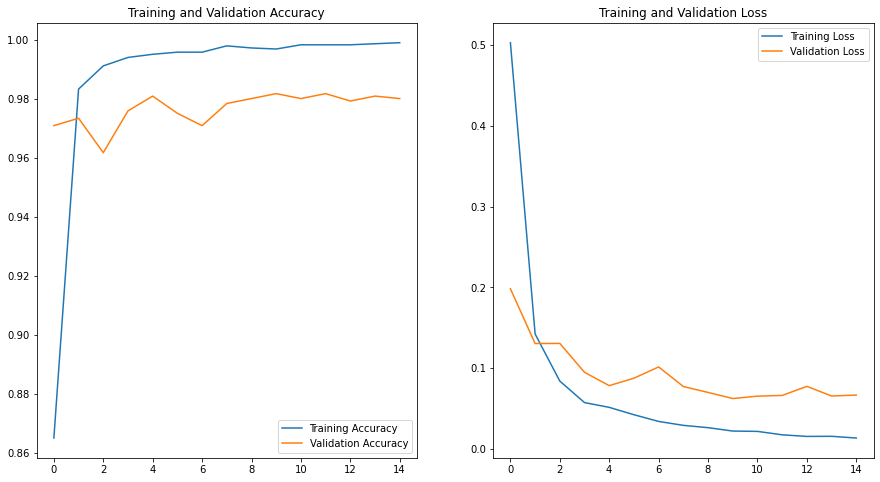

In [5]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the train
data_dir = 'student_data/train'

batch_size = 32
epochs=15

img_height = 224
img_width = 224

train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.3)

test_data_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.3)

train_data = train_data_generator.flow_from_directory(
    data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = test_data_generator.flow_from_directory(
    data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

ResNet50V2 = tf.keras.applications.resnet_v2.ResNet50V2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg',
    classes=4
)

for layer in ResNet50V2.layers:
    layer.trainable = False
    
    model_ResNet = tf.keras.Sequential([
    ResNet50V2,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation = 'softmax')
    ])

model_ResNet.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history = model_ResNet.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model_ResNet.save('resnet.h5')

Found 4000 files belonging to 4 classes.
1/1 [==============================] - 13s 13s/step


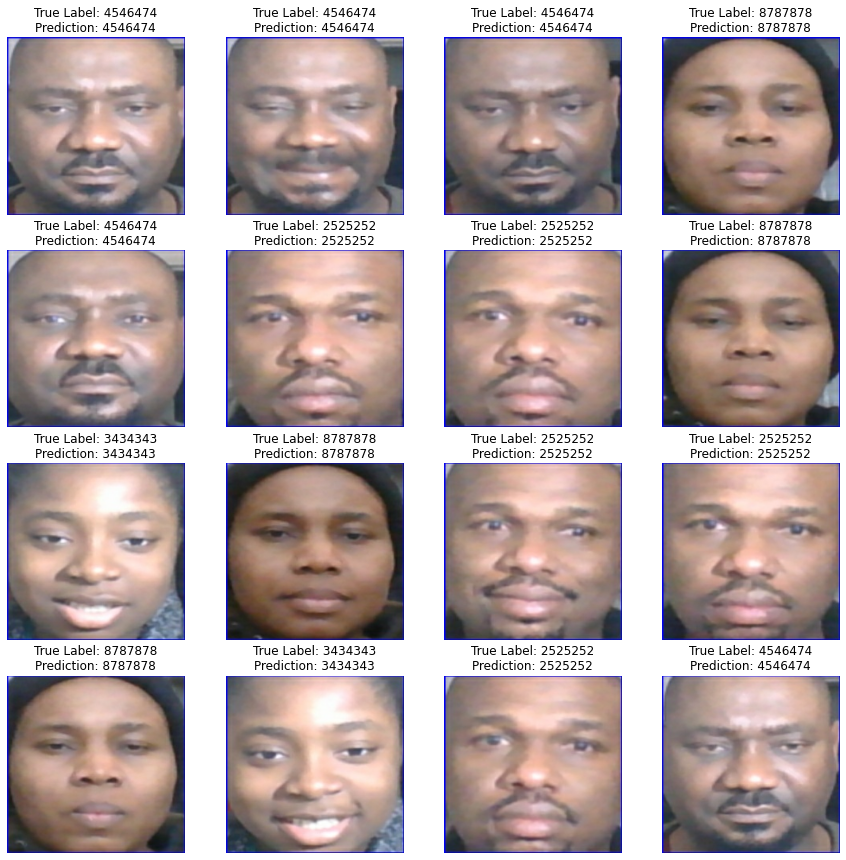

In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory 
predict_list = []

train_dataset = image_dataset_from_directory('student_data/train',
                                             shuffle=True,
                                             batch_size=32,image_size=(224,224))

class_name =  train_dataset.class_names
plt.figure(figsize = (15,15))
for image , label in train_dataset.take(1):  
    np.set_printoptions(suppress=True)
    # Create the array of the right shape to feed into the keras model
    # The 'length' or number of images you can put into the array is
    # determined by the first position in the shape tuple, in this case 1.
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    # turn the image into a numpy array
    image_array = np.asarray(image)
    # Normalize the image
    data = (image_array.astype(np.float32) / 127.0) - 1
    # run the inference
    prediction = model_ResNet.predict(data)
    #print(prediction)
     
    for i in range(16) :      
        plt.subplot(4,4,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title('True Label: ' + class_name[label[i]] + '\n' + 'Prediction: ' + str(class_name[np.argmax(prediction[i])]))
        plt.axis("off")

In [17]:
model_ResNet.summary()

Model: "sequential_763"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten_763 (Flatten)       (None, 2048)              0         
                                                                 
 dense_763 (Dense)           (None, 4)                 8196      
                                                                 
Total params: 23,572,996
Trainable params: 8,196
Non-trainable params: 23,564,800
_________________________________________________________________


In [13]:
import numpy as np
import pandas as pd
import os
from os import listdir
from PIL import Image
from numpy import array
from numpy import asarray
import seaborn as sns

#Load test data set
pathToTestData = 'student_data/test'
test_img_list = list()

shape_sum = 0
class_name_numb = dict()
train_avg_shape = 224

for dirname, _, filenames in os.walk(pathToTestData):
    for filename in filenames:
        img_data = Image.open(os.path.join(dirname, filename))

        resizedImage = img_data.resize((train_avg_shape, train_avg_shape))
        resizedImage = resizedImage.convert('RGB')
        resizedImage = asarray(resizedImage) / 255

        test_img_list.append([resizedImage, filename])

X_test = np.zeros((len(test_img_list), train_avg_shape, train_avg_shape, 3), dtype='float32')

for i, img in enumerate(test_img_list):
    X_test[i] = test_img_list[i][0]

    #Predict on test data
predictions = model_ResNet.predict(X_test, batch_size=None, verbose=0, steps=None,
                               callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)
predictions = pd.DataFrame(predictions)

inverse_label_map = dict()
for k, v in train_data_generator.class_indices.items():
    inverse_label_map[v] = k

pred_label_num = predictions.idxmax(axis=1)
pred_label_num_new = list()

for x in pred_label_num:
    y = inverse_label_map[x]
    pred_label_num_new.append(y)

pred_label_num_new = pd.DataFrame(pred_label_num_new)
print(pred_label_num_new[0])

pred = pd.DataFrame()

testImages = pd.DataFrame(test_img_list)
pred.insert(0, 'file', testImages[1])
pred.insert(1, 'species', pred_label_num_new[0])
pred.head()

pred.to_csv('Predictions_ResNet50V2.csv', index=None, header=True)

df = pd.read_csv('Predictions_ResNet50V2.csv')
df

AttributeError: 'ImageDataGenerator' object has no attribute 'class_indices'